In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import math
import itertools
import time

In [2]:
songs = pd.read_csv('API Scraping Data/pop2000_2023.csv')

In [3]:
songs = songs[songs['popularity'] >= 50]

<AxesSubplot:xlabel='popularity', ylabel='Count'>

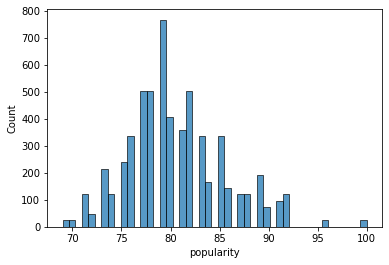

In [4]:
sns.histplot(data = songs, x = 'popularity')

In [5]:
songs['pop'] = [1 if x >= 80 else 0 for x in songs['popularity'] ]

In [6]:
list(songs.columns)

['popularity',
 'year',
 'genre',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature',
 'pop']

In [7]:
binned = pd.qcut(songs['tempo'], 10, retbins = True)
songs['binned'] = binned[0]
songs

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,pop,binned
0,100,2000,pop,0.707,0.681,0,-4.325,1,0.0668,0.06320,...,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,1,"(110.898, 117.999]"
1,92,2000,pop,0.644,0.728,8,-5.750,1,0.0351,0.05430,...,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4,1,"(85.012, 96.107]"
2,92,2000,pop,0.644,0.735,8,-5.747,1,0.0391,0.05210,...,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,1,"(85.012, 96.107]"
3,90,2000,pop,0.684,0.607,11,-8.127,0,0.1000,0.02670,...,81.001,audio_features,0JXXNGljqupsJaZsgSbMZV,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://api.spotify.com/v1/tracks/0JXXNGljqups...,https://api.spotify.com/v1/audio-analysis/0JXX...,195373,4,1,"(61.858000000000004, 85.012]"
4,89,2000,pop,0.561,0.520,11,-9.342,0,0.2440,0.05030,...,153.150,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3,1,"(141.967, 159.969]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,82,2023,pop,0.792,0.625,1,-5.609,1,0.0536,0.00776,...,103.967,audio_features,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0,https://api.spotify.com/v1/tracks/1zi7xx7UVEFk...,https://api.spotify.com/v1/audio-analysis/1zi7...,173987,4,1,"(96.107, 104.948]"
5996,81,2023,pop,0.748,0.524,8,-5.599,1,0.0338,0.41400,...,95.010,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4,1,"(85.012, 96.107]"
5997,77,2023,pop,0.608,0.756,7,-2.675,0,0.1760,0.07840,...,176.086,audio_features,5BKKy9fIJL5uM9fz1SnqyP,spotify:track:5BKKy9fIJL5uM9fz1SnqyP,https://api.spotify.com/v1/tracks/5BKKy9fIJL5u...,https://api.spotify.com/v1/audio-analysis/5BKK...,245507,4,0,"(159.969, 186.003]"
5998,77,2023,pop,0.734,0.605,1,-8.476,1,0.0699,0.01020,...,103.976,audio_features,7GeTsDIc5ykNB6lORO6Cee,spotify:track:7GeTsDIc5ykNB6lORO6Cee,https://api.spotify.com/v1/tracks/7GeTsDIc5ykN...,https://api.spotify.com/v1/audio-analysis/7GeT...,236795,4,0,"(96.107, 104.948]"


In [8]:
binned_data = songs.groupby('binned')['pop'].agg([('outcome_pct', 'mean'), ('nobs','count')]).reset_index(drop=False)
binned_data

,binned,outcome_pct,nobs
0,"(61.858000000000004, 85.012]",0.400,600
1,"(85.012, 96.107]",0.520,600
2,"(96.107, 104.948]",0.520,600
3,"(104.948, 110.898]",0.500,576
4,"(110.898, 117.999]",0.440,600
5,"(117.999, 124.921]",0.360,600
6,"(124.921, 132.052]",0.625,576
7,"(132.052, 141.967]",0.640,600
8,"(141.967, 159.969]",0.480,600
9,"(159.969, 186.003]",0.625,576


Text(0.5, 0, 'Bin')

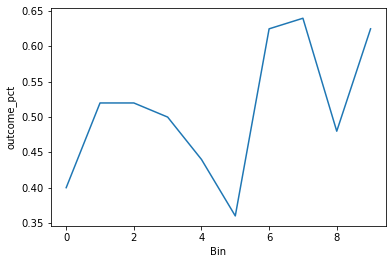

In [9]:
sns.lineplot(x = binned_data.index, y= binned_data['outcome_pct'])
plt.xlabel('Bin')

In [10]:
y1950 = pd.read_csv('Kaggle Data/1950.xls')
y1960 = pd.read_csv('Kaggle Data/1960.xls')
y1970 = pd.read_csv('Kaggle Data/1970.xls')
y1980 = pd.read_csv('Kaggle Data/1980.xls')
y1990 = pd.read_csv('Kaggle Data/1990.xls')
y2000 = pd.read_csv('Kaggle Data/2000.xls')
y2010 = pd.read_csv('Kaggle Data/2010.xls')

In [11]:
y1950['decade'] = 1950
y1960['decade'] = 1960
y1970['decade'] = 1970
y1980['decade'] = 1980
y1990['decade'] = 1990
y2000['decade'] = 2000
y2010['decade'] = 2010

In [12]:
all_data = pd.concat([y1950,y1960,y1970,y1980,y1990,y2000,y2010])

In [13]:
all_data

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,decade
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72,1950
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,1950
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61,1950
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60,1950
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2011,90,80,65,-3,27,80,211,3,10,56,2010
96,97,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56,2010
97,98,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54,2010
98,99,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43,2010


In [1]:
from sklearn.model_selection import train_test_split
X = all_data.drop('pop', axis=1)
y = all_data['pop']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
myTrain = pd.concat([X_train, y_train], axis=1)
myTest = pd.concat([X_test, y_test], axis=1)

NameError: name 'all_data' is not defined

In [15]:
ols_object = smf.ols(formula = 'pop~(dB + live + val + acous + dnce + nrgy + bpm)**2', data = train)

model = ols_object.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     10.84
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           3.23e-36
Time:                        22:01:41   Log-Likelihood:                -2010.7
No. Observations:                 533   AIC:                             4079.
Df Residuals:                     504   BIC:                             4204.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.2119     31.573      2.192      0.029       7.180     131.244
dB            -1.8631      1.536     -1.213      0.226      -4.880       1.154
live           0.0295      0.359      0.082      0.935      -0.676       0.735
val           -0.2271      0.252     -0.901      0.368      -0.722       0.268
acous         -0.5516      0.234     -2.357      0.019      -1.011      -0.092
dnce           0.4774      0.341      1.398      0.163      -0.193       1.148
nrgy          -0.0193      0.333     -0.058      0.954      -0.673       0.634
bpm           -0.0853      0.185     -0.461      0.645      -0.449       0.278
dB:live        0.0212      0.015      1.420      0.156      -0.008       0.050
dB:val        -0.0113      0.010     -1.142      0.254      -0.031       0.008
dB:acous       0.0042      0.009      0.449      0.654      -0.014       0.023
dB:dnce        0.0280      0.016      1.740      0.082      -0.004       0.060
dB:nrgy        0.0070      0.010      0.727      0.468      -0.012       0.026
dB:bpm         0.0077      0.008      0.975      0.330      -0.008       0.023
live:val       0.0018      0.002      0.943      0.346      -0.002       0.005
live:acous    -0.0005      0.002     -0.251      0.802      -0.004       0.003
live:dnce      0.0005      0.003      0.179      0.858      -0.005       0.006
live:nrgy      0.0010      0.003      0.359      0.720      -0.004       0.006
live:bpm      -0.0009      0.001     -0.666      0.506      -0.004       0.002
val:acous     -0.0017      0.001     -1.384      0.167      -0.004       0.001
val:dnce       0.0010      0.002      0.603      0.547      -0.002       0.004
val:nrgy       0.0031      0.002      1.721      0.086      -0.000       0.007
val:bpm       -0.0019      0.001     -1.921      0.055      -0.004    4.34e-05
acous:dnce     0.0010      0.002      0.527      0.598      -0.003       0.005
acous:nrgy     0.0030      0.002      1.966      0.050    2.33e-06       0.006
acous:bpm      0.0026      0.001      2.623      0.009       0.001       0.005
dnce:nrgy     -0.0075      0.003     -2.358      0.019      -0.014      -0.001
dnce:bpm       0.0024      0.002      1.524      0.128      -0.001       0.006
nrgy:bpm       0.0013      0.002      0.723      0.470      -0.002       0.005
==============================================================================
Omnibus:                       19.381   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.483
Skew:                          -0.462   Prob(JB):                     3.57e-05
Kurtosis:                       3.261   Cond. No.                     1.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [16]:
pred_pop = model.predict(test)
print(np.sqrt(((test['pop'] - pred_pop)**2).mean()))

13.384546640498625


In [17]:
pred_pop = model.predict(train)
print(np.sqrt(((train['pop'] - pred_pop)**2).mean()))

10.52247875584465


In [18]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [19]:
X = train[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']]

#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('pop~' + '+'.join(predictor_subset),data = train).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [20]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [21]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [22]:
import statsmodels.formula.api as sm

#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [23]:
models_best = forward_selection()

Processed  9 models on 1 predictors in 0.03500056266784668 seconds.
Processed  8 models on 2 predictors in 0.03099966049194336 seconds.
Processed  7 models on 3 predictors in 0.04099774360656738 seconds.
Processed  6 models on 4 predictors in 0.03399944305419922 seconds.
Processed  5 models on 5 predictors in 0.03700709342956543 seconds.
Processed  4 models on 6 predictors in 0.026519060134887695 seconds.
Processed  3 models on 7 predictors in 0.026005268096923828 seconds.
Processed  2 models on 8 predictors in 0.021000146865844727 seconds.
Processed  1 models on 9 predictors in 0.011005401611328125 seconds.
Total elapsed time: 0.2795286178588867 seconds.


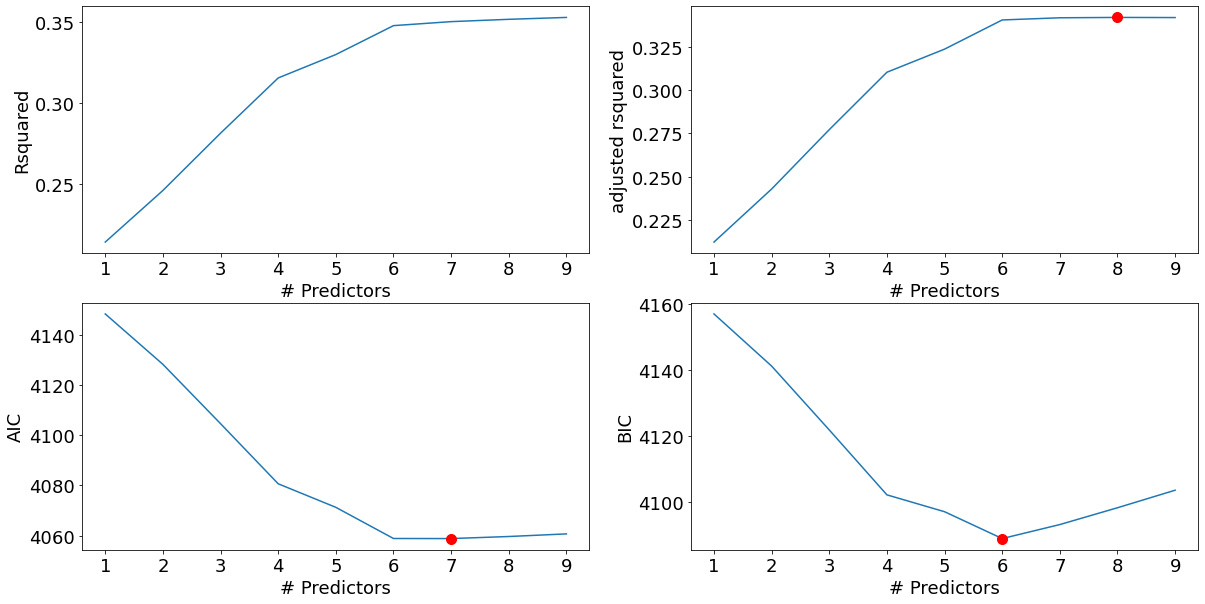

In [24]:
best_sub_plots()

In [25]:
best_fwd_reg_model = models_best['model'][6]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     46.75
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           6.53e-46
Time:                        22:01:42   Log-Likelihood:                -2022.4
No. Observations:                 533   AIC:                             4059.
Df Residuals:                     526   BIC:                             4089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.5827      4.697     15.026      0.000      61.355      79.811
acous         -0.1697      0.024     -7.090      0.000      -0.217      -0.123
dur            0.0389      0.008      4.674      0.000       0.023       0.055
dB             1.0767      0.194      5.543      0.000       0.695       1.458
nrgy          -0.1181      0.041     -2.873      0.004      -0.199      -0.037
dnce           0.1801      0.038      4.742      0.000       0.105       0.255
val           -0.0961      0.025     -3.799      0.000      -0.146      -0.046
==============================================================================
Omnibus:                       11.190   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.409
Skew:                          -0.357   Prob(JB):                      0.00333
Kurtosis:                       3.068   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Finding the RMSE of the model selected using the forward selection procedure, where the predictors
#include 2-factor interactions
pred_pop = best_fwd_reg_model.predict(test)
np.sqrt(((pred_pop - test['pop'])**2).mean())

13.009560351987444

In [27]:
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 9 models on 1 predictors in 0.030999422073364258 seconds.
Processed 36 models on 2 predictors in 0.1462860107421875 seconds.
Processed 84 models on 3 predictors in 0.3894836902618408 seconds.
Processed 126 models on 4 predictors in 0.6300015449523926 seconds.
Processed 126 models on 5 predictors in 0.7219998836517334 seconds.
Processed 84 models on 6 predictors in 0.5380003452301025 seconds.
Processed 36 models on 7 predictors in 0.3075528144836426 seconds.
Processed 9 models on 8 predictors in 0.06901836395263672 seconds.
Processed 1 models on 9 predictors in 0.007976770401000977 seconds.
Total elapsed time: 2.863358736038208 seconds.


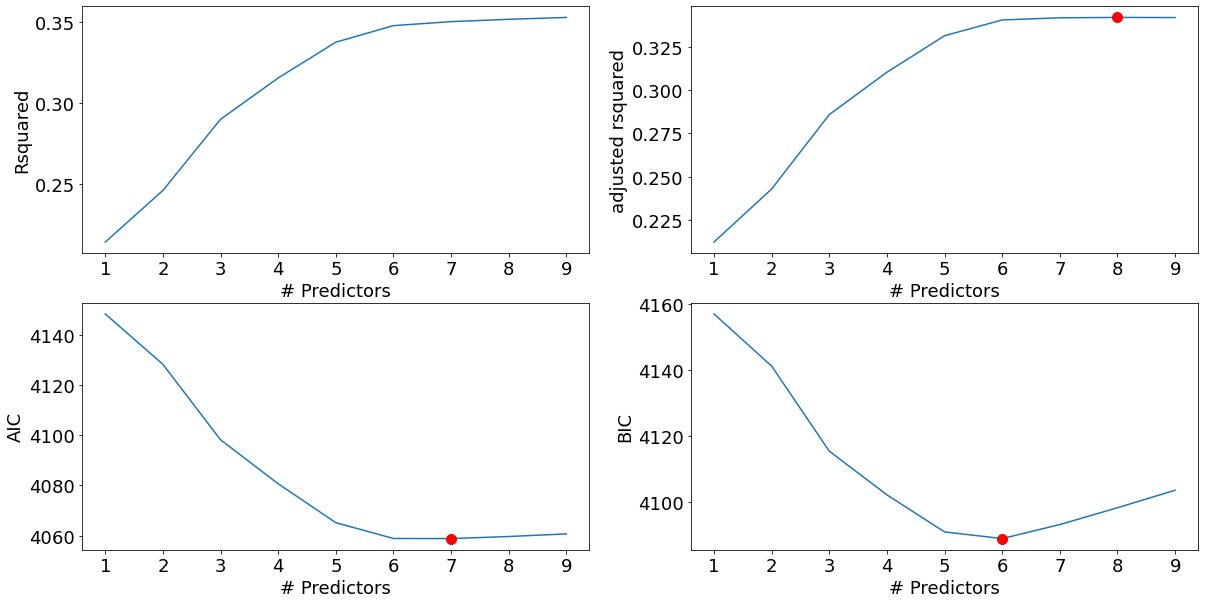

In [28]:
best_sub_plots()

In [29]:
best_subset_model = models_best.loc[6,'model']
models_best.loc[6,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     46.75
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           6.53e-46
Time:                        22:01:45   Log-Likelihood:                -2022.4
No. Observations:                 533   AIC:                             4059.
Df Residuals:                     526   BIC:                             4089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.5827      4.697     15.026      0.000      61.355      79.811
nrgy          -0.1181      0.041     -2.873      0.004      -0.199      -0.037
dnce           0.1801      0.038      4.742      0.000       0.105       0.255
dB             1.0767      0.194      5.543      0.000       0.695       1.458
val           -0.0961      0.025     -3.799      0.000      -0.146      -0.046
dur            0.0389      0.008      4.674      0.000       0.023       0.055
acous         -0.1697      0.024     -7.090      0.000      -0.217      -0.123
==============================================================================
Omnibus:                       11.190   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.409
Skew:                          -0.357   Prob(JB):                      0.00333
Kurtosis:                       3.068   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='dur', ylabel='pop'>

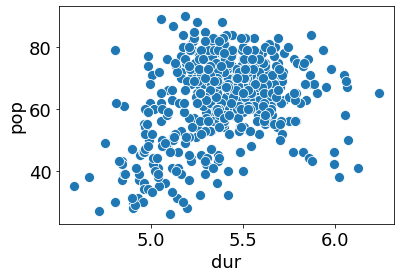

In [30]:
sns.scatterplot(data = train, x = np.log(train['dur']), y = train['pop'])

In [31]:
ols_object = smf.ols(formula = 'pop ~ (val + dnce + dB + nrgy)**2 + np.log(dur)*acous', data = train)

model = ols_object.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     25.02
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           5.54e-47
Time:                        22:01:45   Log-Likelihood:                -2006.6
No. Observations:                 533   AIC:                             4041.
Df Residuals:                     519   BIC:                             4101.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            31.5565     22.878      1.379      0.168     -13.389      76.502
val                  -0.2611      0.188     -1.388      0.166      -0.631       0.109
dnce                  0.6538      0.232      2.818      0.005       0.198       1.110
dB                    0.7943      0.700      1.135      0.257      -0.581       2.170
nrgy                  0.1575      0.161      0.980      0.328      -0.158       0.473
val:dnce             -0.0004      0.002     -0.260      0.795      -0.003       0.003
val:dB               -0.0082      0.009     -0.881      0.378      -0.027       0.010
val:nrgy              0.0022      0.002      1.444      0.149      -0.001       0.005
dnce:dB               0.0079      0.013      0.599      0.549      -0.018       0.034
dnce:nrgy            -0.0064      0.003     -2.516      0.012      -0.011      -0.001
dB:nrgy               0.0056      0.007      0.799      0.424      -0.008       0.019
np.log(dur)           5.3615      3.222      1.664      0.097      -0.967      11.690
acous                -1.0270      0.351     -2.926      0.004      -1.716      -0.338
np.log(dur):acous     0.1646      0.065      2.515      0.012       0.036       0.293
==============================================================================
Omnibus:                       12.262   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.453
Skew:                          -0.364   Prob(JB):                      0.00198
Kurtosis:                       3.176   Cond. No.                     3.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

In [45]:
X = train[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']]

#Since 'X' will change when we include interactions, we need a backup containing all individual predictors
X_backup = train[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']]

In [46]:
#Including 2-factor interactions of predictors in train and 'X'. Note that we need train to develop the model, and X to 
#find 'k' variable subsets from amongst all the predictors under consideration
for combo in itertools.combinations(X_backup.columns, 2):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]] # creating interaction terms
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]] # Creating interaction terms
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # Creating the same X

C:\Users\grant\AppData\Local\Temp\ipykernel_20132\1390686856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # Creating the same X
C:\Users\grant\AppData\Local\Temp\ipykernel_20132\1390686856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # Creating the same X
C:\Users\grant\AppData\Local\Temp\ipykernel_20132\1390686856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy 

C:\Users\grant\AppData\Local\Temp\ipykernel_20132\1390686856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # Creating the same X
C:\Users\grant\AppData\Local\Temp\ipykernel_20132\1390686856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # Creating the same X
C:\Users\grant\AppData\Local\Temp\ipykernel_20132\1390686856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [47]:
models_best = forward_selection()

Processed  45 models on 1 predictors in 0.12906956672668457 seconds.
Processed  44 models on 2 predictors in 0.14896082878112793 seconds.
Processed  43 models on 3 predictors in 0.19500017166137695 seconds.
Processed  42 models on 4 predictors in 0.25299835205078125 seconds.
Processed  41 models on 5 predictors in 0.25967836380004883 seconds.
Processed  40 models on 6 predictors in 0.3334934711456299 seconds.
Processed  39 models on 7 predictors in 0.3395540714263916 seconds.
Processed  38 models on 8 predictors in 0.3265523910522461 seconds.
Processed  37 models on 9 predictors in 0.319857120513916 seconds.
Processed  36 models on 10 predictors in 0.3429994583129883 seconds.
Processed  35 models on 11 predictors in 0.43330979347229004 seconds.
Processed  34 models on 12 predictors in 0.3839993476867676 seconds.
Processed  33 models on 13 predictors in 0.36699891090393066 seconds.
Processed  32 models on 14 predictors in 0.44019508361816406 seconds.
Processed  31 models on 15 predictor

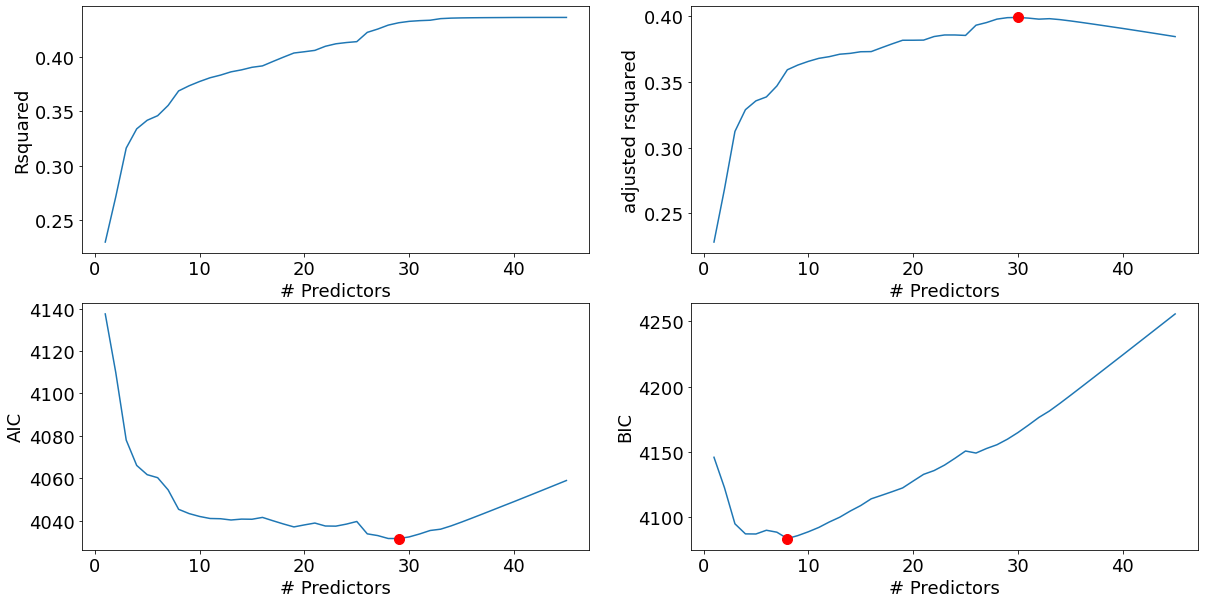

In [48]:
best_sub_plots()

In [49]:
best_interaction_model = models_best['model'][8]
best_interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     38.28
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           6.81e-48
Time:                        22:37:56   Log-Likelihood:                -2013.7
No. Observations:                 533   AIC:                             4045.
Df Residuals:                     524   BIC:                             4084.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.2850      2.662     25.649      0.000      63.055      73.515
dB_acous       0.0137      0.003      4.920      0.000       0.008       0.019
val           -0.1009      0.024     -4.159      0.000      -0.149      -0.053
dnce_dur      -0.0005      0.000     -1.875      0.061      -0.001    2.24e-05
nrgy_dB        0.0116      0.004      2.808      0.005       0.003       0.020
live_acous    -0.0019      0.001     -2.314      0.021      -0.004      -0.000
dB_dur        -0.0063      0.001     -4.504      0.000      -0.009      -0.004
dnce           0.2930      0.070      4.168      0.000       0.155       0.431
dB             1.4038      0.422      3.330      0.001       0.576       2.232
==============================================================================
Omnibus:                       19.414   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.559
Skew:                          -0.456   Prob(JB):                     3.43e-05
Kurtosis:                       3.308   Cond. No.                     8.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
pred_pop = best_interaction_model.predict(test)
(np.abs(test['pop'] - pred_pop)).mean()

10.815044623053428

In [51]:
# forward selection 2 factor interaction not better.

In [52]:
ols_object = smf.ols(formula = 'pop~dB*acous + val + dnce*np.log(dur) + nrgy*dB + live*acous + dB*np.log(dur) + dnce + dB', data = train)

model = ols_object.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     27.90
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           7.37e-49
Time:                        22:38:03   Log-Likelihood:                -2003.8
No. Observations:                 533   AIC:                             4034.
Df Residuals:                     520   BIC:                             4089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.8273     57.369     -0.049      0.961    -115.530     109.876
dB                   7.9104      3.043      2.600      0.010       1.932      13.888
acous               -0.0192      0.067     -0.287      0.775      -0.151       0.112
dB:acous             0.0099      0.006      1.541      0.124      -0.003       0.022
val                 -0.0830      0.025     -3.312      0.001      -0.132      -0.034
dnce                 1.7175      0.690      2.489      0.013       0.362       3.073
np.log(dur)         14.0977     10.477      1.346      0.179      -6.484      34.680
dnce:np.log(dur)    -0.2858      0.128     -2.234      0.026      -0.537      -0.035
nrgy                -0.0722      0.080     -0.905      0.366      -0.229       0.084
nrgy:dB              0.0060      0.008      0.731      0.465      -0.010       0.022
live                 0.0335      0.043      0.782      0.435      -0.051       0.118
live:acous          -0.0024      0.001     -1.999      0.046      -0.005   -4.17e-05
dB:np.log(dur)      -1.3775      0.539     -2.556      0.011      -2.436      -0.319
==============================================================================
Omnibus:                       17.167   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.320
Skew:                          -0.403   Prob(JB):                     0.000105
Kurtosis:                       3.418   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2]:
useful.dtypes

NameError: name 'useful' is not defined

In [ ]:
sns.scatterplot(data = myTrain, x = 'out_prncp_inv', y = '')